In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.18.0'

# Supervise Machine Learning

is a type of machine learning where an algorithm is trained using labeled data, meaning the input data comes with corresponding correct output labels. The algorithm learns to map inputs to outputs by finding patterns in the training data. Once trained, it can predict outputs for new, unseen data accurately. This process typically involves collecting labeled data, training a model with this data, testing the model's accuracy on unseen data, and then using the model for predictions.

- Linear Regression
- Logistic Regression
- Decision Trees
- Random Forests
- Support Vector Machine (SVM)

### Linear Regression

A supervised learning algorithm used to model the relationship between a dependent variable (output) and one or more independent variables (inputs) by fitting a linear equation to observed data points. The assumption is that the relationship between the input variables and the output is linear—that is, the output changes at a constant rate as the input changes.

**How Linear Regression Works:**
- The algorithm uses training data with known inputs and outputs.
- It fits a line by minimizing the sum of squared differences between the observed outputs and predicted values (ordinary least squares method).
- The model then can predict the output for new unseen inputs based on this fitted line.

**Usage in Machine Learning:**
- Predict continuous outcomes like house prices, stock prices, or exam scores based on features.
- Understand relationships between variables (e.g., effect of study hours on scores).
- Foundation for more complex models.
- Simple, interpretable, and computationally efficient.

**Example use case:**
- Predicting a student's exam score based on hours studied.

In [5]:
height = np.array([5, 5.2, 5.5, 6.2, 6.8])
weight = np.array([52, 55, 62, 68, 72])

Text(0, 0.5, 'Weight')

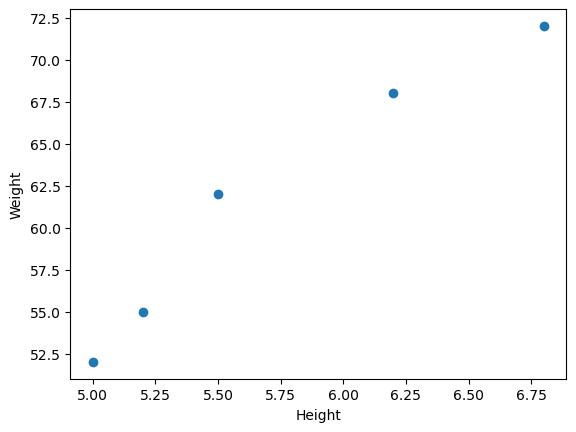

In [12]:
plt.scatter(height, weight)
plt.xlabel("Height")
plt.ylabel("Weight")

In [8]:
m, b = np.polyfit(height, weight, 1)

Text(0, 0.5, 'Weight')

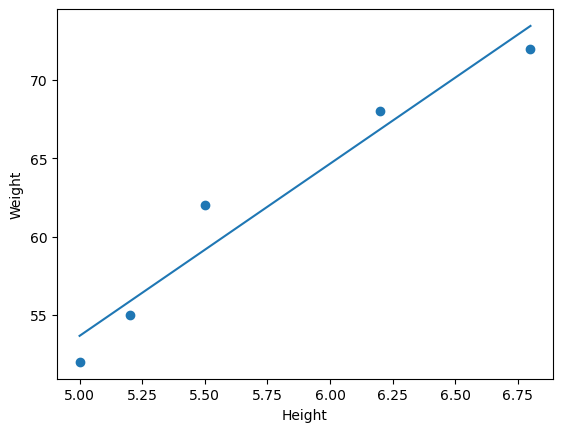

In [11]:
plt.scatter(height, weight)
plt.plot(height, m * height + b)
plt.xlabel("Height")
plt.ylabel("Weight")

In [19]:
new_height = 6.2
predicted_weight = m * new_height + b
print(f"Predicted Height: {predicted_weight}")

Predicted Height: 66.85752688172045


### Using sklearn

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [68]:
data = pd.read_csv("data/car_purchasing_data.csv")
data.head()

,Customer Name,Customer e-mail,Country,gender,age,salary,debt,worth,amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [28]:
X = data[["gender", "age", "salary", "debt", "worth"]]
y = data["amount"]

In [30]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [33]:
to_predict_data = np.array([[0, 22, 55000, 0, 10000]])
print(f"Predicted Price: {model.predict(to_predict_data)}")

Predicted Price: [7596.91315183]


/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Logistic Regression

is a supervised learning algorithm used for classification problems, especially binary classification. predicts the probability of an input belonging to a particular class by modeling the relationship between independent variables and a binary dependent variable.

Logistic regression can also be extended to multinomial or ordinal logistic regression for cases with more than two classes or ordered classes.

Its simplicity, interpretability, and efficiency make logistic regression a foundational algorithm in classification tasks in machine learning.

**How it works:**
- Logistic regression uses the logistic (sigmoid) function to convert the linear combination of input features into a probability value between 0 and 1.
- The output probability represents the likelihood of the input belonging to the positive class (e.g., 1).
- A threshold (commonly 0.5) is applied to decide the predicted class — above the threshold means one class (1), below means the other class (0).

**Usage:**
- Predicting whether an email is spam or not.
- Diagnosing whether a patient has a disease (yes/no).
- Customer churn prediction (whether a customer will leave).
- Fraud detection in transactions.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv("data/heartdiseases_lite.csv")
data.head()

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,Female,Bachelor's Degree,65000,No,180,No
1,55,Male,High School Diploma,40000,Yes,245,Yes
2,30,Female,Master's Degree,80000,Yes,210,No
3,39,Male,Some College,50000,Yes,195,No
4,27,Male,Some College,30000,No,170,No


In [70]:
data = pd.get_dummies(data, columns=["Gender", "Education", "Smoker"], drop_first = True)
data.head()

,Age,Income,Cholesterol,Heart_Disease,Gender_Male,Education_Doctorate Degree,Education_High School Diploma,Education_Master's Degree,Education_Some College,Smoker_Yes
0,42,65000,180,No,False,False,False,False,False,False
1,55,40000,245,Yes,True,False,True,False,False,True
2,30,80000,210,No,False,False,False,True,False,True
3,39,50000,195,No,True,False,False,False,True,True
4,27,30000,170,No,True,False,False,False,True,False


In [46]:
X = data.drop("Heart_Disease", axis=1)
y = data["Heart_Disease"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_preds = model.predict(X_test)
y_preds

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No'], dtype=object)

In [56]:
accuracy_score(y_test, y_preds)

1.0

In [59]:
y_preds_proba = model.predict_proba(X_test)[:,1]
y_preds_proba

array([0.21494141, 0.06872062, 0.8327796 , 0.63329934, 0.57825411,
       0.23845979, 0.23845979, 0.75334069, 0.13811938, 0.15857231,
       0.65598708, 0.13599046, 0.59781995, 0.08029478, 0.40263061])

In [60]:
y_test = y_test.map({"Yes": 1, "No": 0})

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_proba)
auc = roc_auc_score(y_test, y_preds_proba)

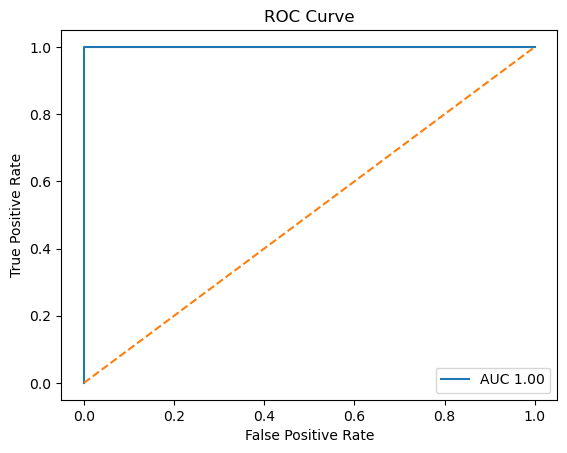

In [63]:
plt.plot(fpr, tpr, label=f"AUC {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")

In [67]:
odds_ratios = np.exp(model.coef_)
odds_ratios

array([[1.28549212, 0.99996637, 0.96345121, 1.14317043, 1.58385926,
        1.96057811, 1.58581283, 0.46398878, 1.04525922]])